
## Binomial One Step Model


In [2]:
import graphviz


Let's consider a very simple model to describe stock price movements. It will be
enough to go through the mains notions of derivatives pricing.

### Model description

#### Time

By "One Step", we suppose that only one unit of time occurs. We start at time
$0$ to go at time $1$. This unit of time can represent any period (6 months, 1
year, ...) and should always be explicited in the exercise.

#### Non Risky Asset (Cash)

Let $B_t$ denote a non risky asset price, and
$S_t$ a token spot price. $B_t$ is deterministic:

$$\begin{aligned}   
B_0 &= 1, \\   
B_1 &= 1+R. \end{aligned}$$

#### Stock

Given $d < u$ and $p_u+p_d=1$, the stock price is a random variable:

$$\begin{aligned}
  S_0 &=& s \\
  S_1 &=& s \times 
  \left\{
  \begin{aligned}
   u\\
   d\\
  \end{aligned}
  \right.
\end{aligned}$$

* $u$ stands for "up" scenario with proba $p_u$, 
* $d$ stands for "down" scenario with proba $p_d$
* Do you expect $\mathbb{E}(S_1)=S_0$? We don't impose any relation of this
  kind.


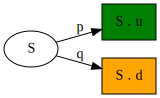

In [5]:
graphviz.Source.from_file(r"data/graphviz/binomial.dot")



### Portfolio and arbitrage

A vector $h=(x,y)$ defines a portfolio on market $(B,S)$ at time $0$. 

* $x$ is the quantity of cash, and 
* $y$ the number of stocks in this portfolio. 

Quantities can be positive of negative (negative $x$ means that cash is
borrowed, negative $y$ that the porfolio holds a short position on the token).

We formulate the following hypothesis:

1. Fractionnal, long and short position are allowed
2. No bid/ask spread
3. No transaction costs
4. Liquid market: we can buy and sell any aligneduantity at market price

#### Portfolio Value

**The value of the portfolio $h$ is the stochastic process
$V_t^h = x B_t+ yS_t$,  $t \in \{0,1\}$**

i.e.:

$$\begin{aligned}
  V_0^h &=& x + yS \\
  V_1^h &=& x(1+R) + ySZ 
\end{aligned}$$

#### Arbitrage Portfolio

In this context, we have the tools to formally define an arbitrage. **An
arbitrage portfolio** is a portfolio such that:

$$
\begin{aligned}
  V_0^h &=& 0 \\
  \mathbb{P}(V_1^h > 0) &>& 0 \\
  \mathbb{P}(V_1^h \leq 0) &=& 0
\end{aligned}
$$

The existence of such a portfolio is a market anomaly. A market is said without
arbitrage opportunity if there is no arbitrage portfolio (noted: **AoA**).

### AoA

#### Condition for AoA

**The 1-step binomial model is *AOA* if and only if $d \leq (1+R) \leq u$.**

To prove it, construct arbitrage portfolio (by buying or selling stock).

#### Risk Neutral Probability

**This market is AoA if and only if there exist a probability $\mathbb{Q}$
such that: $S_0 = \frac{1}{1+R}\mathbb{E}^{\mathbb{Q}}[S_1]$**

This probability is called the *martingale*, or *risk-neutral* probability.

### Derivative product

**Definition (derivative)**: a derivative (contingent claim) is a random 
variable $X$ written as a function $X=\Phi(S)$ of the stock price. This is 
a contract that allow to its possessor to be paid $X$. $\Phi$ is the payoff 
function.

A typical example is an european call option, with exercise price $K > sd$:

$$
X=\left\{
\begin{array}{ll}
su-K,&  if \quad Z=u\\
0,& if \quad Z=d
\end{array}
\right.
$$

How can we determine the price of such a contract? We note $\Pi(t,X)$ it's 
price. We have obviously $\Pi(1,X)=X$. The question is what is $\Pi(0,X)$.

**Definition (replicable)**: A derivative is said to be replicable if there 
exists a portfolio $h$ such that $$\mathbb{P}(V_1^h = X) = 1$$.
This porfolio is called the hedge portfolio. 

If every derivative is replicable the market is said to be **complete**.

### Pricing by replication

By AoA arguments, if a derivative is replicable its price can't be different 
than the value at $0$ of it's replication porfolio ($V_0^h$)

$$
 \begin{aligned}
   x &=& \frac{1}{1+R}\frac{u\Phi(Sd)-d\Phi(Su)}{u-d} \\
   y &=& \frac{\Phi(Su)-\Phi(Sd)}{Su-Sd}.
 \end{aligned}
 $$

**exercise**: prove that if 2 replication porfolios exist, their prices at 0 
should be the same.

### Risk neutral pricing

First, have a look of a pricing of a Call of strike $K = 100$, with $S = 100$, $Su = 120$ ans $Sd = 90$ with probabilities 50%. If we replace historical probabilities with $q_u=1/3$ and $q_d = 2/3$ we find that $\mathbb{E}^{\mathbb{Q}}[Call(S_1)]$ equals the replication portfolio value at $t_0$.

This is the point! We can reformulate previous replication porfolio value at $t_0$ to make $q_u$ and $q_d$ appear. Let's do it.

$$
 \begin{aligned}
   \Pi(0;X) &=& V_0^h=x+sy \\
   ~~ &=& \frac{1}{1+R}\left\{ \Phi(Su)  \frac{(1+R)-d}{u-d} + \Phi(Sd)\frac{u-(1+R)}{u-d}\right\} \\
   ~~ &=& \frac{1}{1+R}\left\{\Phi(Su)\cdot q_u + \Phi(Sd) \cdot q_d \right \} \\
   \Pi(0;X) &=& \frac{1}{1+R}\mathbb{E}^\mathbb{Q}[X]
 \end{aligned}
$$

This result is central in derivative pricing. It's called the :

#### FTAP (Fundamental Theorem of Asset Pricing)

The price of a replicable derivative $X$ can be derived from the expectation of it's final values unde the **risk neutral** probability $\mathbb{Q}$.

$$\Pi(0;X) = \frac{1}{1+R}\mathbb{E}^Q[X]$$

### Remarks

1. Subjectives proba $q_u$ and $q_d$ have no link with historical probabilities
2. To compute derivatives prices, we have to use *risk neutral* computations
3. Pricing is then independent from investors preferences
4. This is the core message of Black-and-Scholes: pricing not an insurance
   business. It's not about pooling premium to give payoff back, it's about
   replication!